In [2]:
!pip install contractions


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import sys  
!{sys.executable} -m pip install contractions
import contractions
import re # REGULAR EXPRESSION
import inflect
import string
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


# Chargement du dataset

In [2]:
df = pd.read_csv("Mental_Health_FAQ.csv")

In [3]:
df_copy = df.copy()

# Pre Processing 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Question_ID  98 non-null     int64 
 1   Questions    98 non-null     object
 2   Answers      98 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [5]:
df = df.drop('Question_ID',axis = 1)

In [6]:
list_columns = ["Questions","Answers"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  98 non-null     object
 1   Answers    98 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


In [8]:
df.head()

Questions  \
0        What does it mean to have a mental illness?   
1                    Who does mental illness affect?   
2                        What causes mental illness?   
3  What are some of the warning signs of mental i...   
4            Can people with mental illness recover?   

                                             Answers  
0  Mental illnesses are health conditions that di...  
1  It is estimated that mental illness affects 1 ...  
2  It is estimated that mental illness affects 1 ...  
3  Symptoms of mental health disorders vary depen...  
4  When healing from mental illness, early identi...

In [9]:
def to_lower(text):
    return text.lower()

for elt in list_columns :
    df[elt] = df[elt].apply(lambda x: to_lower(x)if(np.all(pd.notnull(x))) else x)



In [10]:
df.head()

Questions  \
0        what does it mean to have a mental illness?   
1                    who does mental illness affect?   
2                        what causes mental illness?   
3  what are some of the warning signs of mental i...   
4            can people with mental illness recover?   

                                             Answers  
0  mental illnesses are health conditions that di...  
1  it is estimated that mental illness affects 1 ...  
2  it is estimated that mental illness affects 1 ...  
3  symptoms of mental health disorders vary depen...  
4  when healing from mental illness, early identi...

In [11]:
def contractions_w(text):
    expanded_words = []
    for word in text.split():
        expanded_words.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_words)
    return expanded_text

for elt in list_columns :
    df[elt] = df[elt].apply(lambda x: contractions_w(x)if(np.all(pd.notnull(x))) else x)


In [12]:
df

Questions  \
0         what does it mean to have a mental illness?   
1                     who does mental illness affect?   
2                         what causes mental illness?   
3   what are some of the warning signs of mental i...   
4             can people with mental illness recover?   
..                                                ...   
93           how do i know if i am drinking too much?   
94  if cannabis is dangerous, why are we legalizin...   
95       how can i convince my kids not to use drugs?   
96  what is the legal status (and evidence) of cbd...   
97                    what is the evidence on vaping?   

                                              Answers  
0   mental illnesses are health conditions that di...  
1   it is estimated that mental illness affects 1 ...  
2   it is estimated that mental illness affects 1 ...  
3   symptoms of mental health disorders vary depen...  
4   when healing from mental illness, early identi...  
..                                                ...  
93  sorting out if you are drinking too much can b...  
94  cannabis smoke, for example, contains cancer-c...  
95  you cannot. but you can influence their capaci...  
96  cannabidiol or cbd is a naturally occurring co...  
97  "vaping" is the term for using a device where ...  

[98 rows x 2 columns]

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
           text = text.replace(punctuation, '')
    return text

for elt in list_columns :
    df[elt] = df[elt].apply(lambda x: remove_punctuations(x) if(np.all(pd.notnull(x))) else x)


In [14]:
df

Questions  \
0          what does it mean to have a mental illness   
1                      who does mental illness affect   
2                          what causes mental illness   
3   what are some of the warning signs of mental i...   
4              can people with mental illness recover   
..                                                ...   
93            how do i know if i am drinking too much   
94  if cannabis is dangerous why are we legalizing it   
95        how can i convince my kids not to use drugs   
96   what is the legal status and evidence of cbd oil   
97                     what is the evidence on vaping   

                                              Answers  
0   mental illnesses are health conditions that di...  
1   it is estimated that mental illness affects 1 ...  
2   it is estimated that mental illness affects 1 ...  
3   symptoms of mental health disorders vary depen...  
4   when healing from mental illness early identif...  
..                                                ...  
93  sorting out if you are drinking too much can b...  
94  cannabis smoke for example contains cancercaus...  
95  you cannot but you can influence their capacit...  
96  cannabidiol or cbd is a naturally occurring co...  
97  vaping is the term for using a device where li...  

[98 rows x 2 columns]

In [15]:
df["Answers"][70]

'someone else’s illness is not your fault you also cannot control how someone else feels their illness or the things they do or say what you can do is take care of yourself learning more about your parent’s illness can make it a bit easier to understand what they experience on this website you can find easytoread booklets on mental illnesses as well as longer info sheets on many different mental illnesses you can also find information for young people from the centre for addiction and mental health it is important to take care of yourself too a lot of people have a big mix of feelings when a parent is not well you might feel angry embarrassed scared or many other things these feelings and experiences can have a big impact on the way your think about yourself and other people when you are on an airplane and the flight attendants go through the safety demonstration they tell you to put your own oxygen mask on before your help other people that is because it is hard to help someone else i

In [16]:

def remove_number(text):
    new_text = []
    for i in text:
        if  i.isnumeric() == False  : 
            new_text.append(i)
        else: 
            continue
    return ''.join(new_text)
        
        
for elt in list_columns :
    df[elt] = df[elt].apply(lambda x: remove_number(x) if(np.all(pd.notnull(x))) else x)




In [17]:
df.head()

Questions  \
0         what does it mean to have a mental illness   
1                     who does mental illness affect   
2                         what causes mental illness   
3  what are some of the warning signs of mental i...   
4             can people with mental illness recover   

                                             Answers  
0  mental illnesses are health conditions that di...  
1  it is estimated that mental illness affects  i...  
2  it is estimated that mental illness affects  i...  
3  symptoms of mental health disorders vary depen...  
4  when healing from mental illness early identif...

In [18]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

for elt in list_columns :
    df[elt] = df[elt].apply(lambda x: remove_stopwords(x)if(np.all(pd.notnull(x))) else x)


##### Lemming / Stemming

In [20]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])


for elt in list_columns :
    df[elt] = df[elt].apply(lambda x: stem_words(x)if(np.all(pd.notnull(x))) else x)



In [21]:
df.head()

Questions                                            Answers
0         mean mental ill  mental ill health condit disrupt personâ€™ tho...
1       mental ill affect  estim mental ill affect adult america adult se...
2         caus mental ill  estim mental ill affect adult america adult se...
3    warn sign mental ill  symptom mental health disord vari depend type ...
4  peopl mental ill recov  heal mental ill earli identif treatment vital ...

In [23]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

for elt in list_columns :
    df[elt] = df[elt].apply(lambda x: lemmatize_words(x)if(np.all(pd.notnull(x))) else x)

In [24]:
df.head()

Questions                                            Answers
0         mean mental ill  mental ill health condit disrupt personâ€™ tho...
1       mental ill affect  estim mental ill affect adult america adult se...
2         caus mental ill  estim mental ill affect adult america adult se...
3    warn sign mental ill  symptom mental health disord vari depend type ...
4  peopl mental ill recov  heal mental ill earli identif treatment vital ...

In [25]:
def remove_web(text):
    text = text.split()
    for elt in text:
        if "www" in elt:
            text.remove(elt)
    return ' '.join(text)

for elt in list_columns :
    df[elt] = df[elt].apply(lambda x: remove_stopwords(x)if(np.all(pd.notnull(x))) else x)

In [26]:

for line in range(len(df["Answers"])):
    if "â€™" in df["Answers"][line]:
        for i in df["Answers"][line]:
            if i == "â" or i == "€" or i == "™":
                df["Answers"][line] = df["Answers"][line].replace(i,'')
                

# Différentes représentations de nos données

In [27]:
d_list = df["Questions"].values.tolist()
d_list_split = []
for elt in d_list:
    d_list_split.append(elt.split())

list_of_words = []
d_list_split
for i in range(len(d_list_split)):
    for elt in d_list_split[i]:
        list_of_words.append(elt)

df_words = pd.DataFrame(list_of_words,columns = ["words"])


In [28]:
fig = px.histogram(df_words, x='words', template='plotly_white', title='Number of words')
fig.update_xaxes(categoryorder='category ascending', title='Words').update_yaxes(title='Number of words')
fig.show()

#### On se rend facilement compte que l'on a du mal à visualiser correctement avec cette représentation

In [29]:
#df_words.groupby(['words']).filter(lambda x : len(x)>20)
sub_df = df_words[df_words.groupby('words').words.transform('count')>5].copy()

In [30]:
print(sub_df)

       words
1     mental
2        ill
3     mental
4        ill
7     mental
..       ...
381     help
384      use
385  problem
386     know
394      use

[143 rows x 1 columns]


---------------------- Two different representation -----------------------------


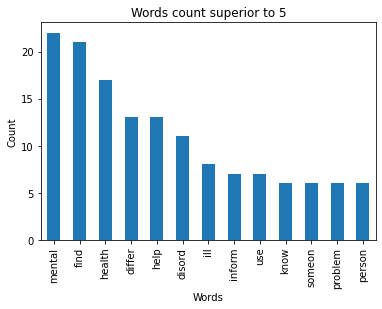

In [31]:
fig = px.histogram(sub_df, x='words', template='plotly_white', title='Words count superior to 5')
fig.update_xaxes(categoryorder='category ascending', title='Words').update_yaxes(title='Number of words')
fig.show()


print("---------------------- Two different representation -----------------------------")

sub_df["words"].value_counts().plot(kind='bar')
plt.title('Words count superior to 5')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

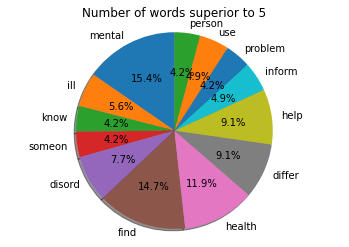

In [32]:

df_words['Counts'] = df_words.groupby('words')['words'].transform('count')
sub_dff = df_words[df_words.groupby('words').words.transform('count')>5].copy()




sub_dff = sub_dff.drop_duplicates(subset=None, 
                          keep='first', 
                          inplace=False, 
                          ignore_index=False)




labels = sub_dff["words"]
sizes = sub_dff["Counts"]
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.savefig('PieChart01.png')
plt.title("Number of words superior to 5")
plt.show()



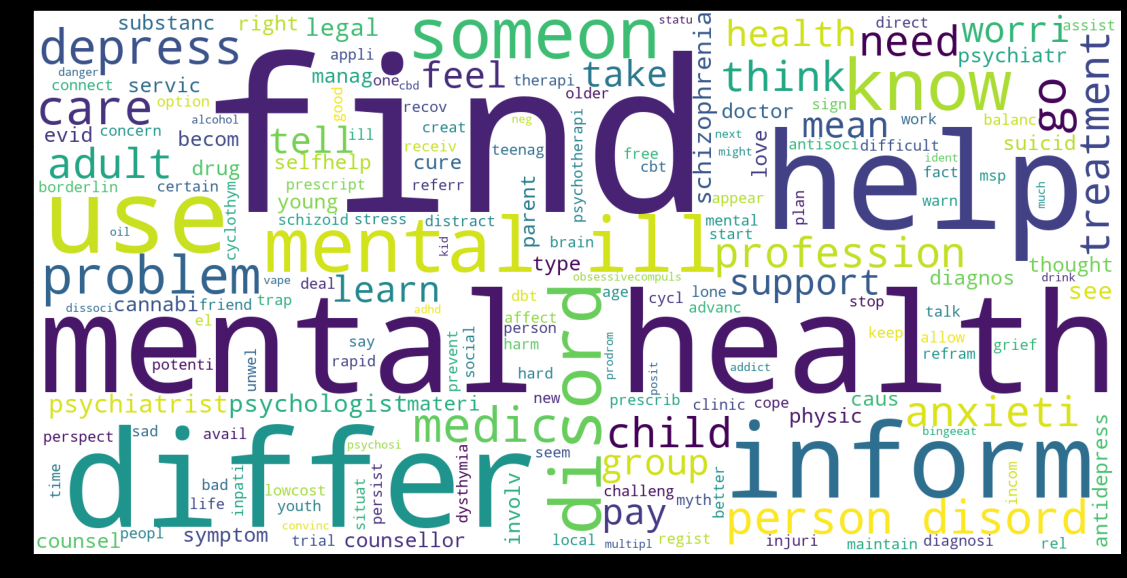

In [33]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_words['words'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [34]:
df.head()

Questions                                            Answers
0         mean mental ill  mental ill health condit disrupt person though...
1       mental ill affect  estim mental ill affect adult america adult se...
2         caus mental ill  estim mental ill affect adult america adult se...
3    warn sign mental ill  symptom mental health disord vari depend type ...
4  peopl mental ill recov  heal mental ill earli identif treatment vital ...

In [35]:
d_list = df["Answers"].values.tolist()
d_list_split = []
for elt in d_list:
    d_list_split.append(elt.split())

list_of_words = []
d_list_split
for i in range(len(d_list_split)):
    for elt in d_list_split[i]:
        list_of_words.append(elt)

df_words = pd.DataFrame(list_of_words,columns = ["words"])



In [36]:
#df_words.groupby(['words']).filter(lambda x : len(x)>20)
sub_df = df_words[df_words.groupby('words').words.transform('count')>50].copy()

In [37]:
print(sub_df)

          words
0        mental
1           ill
2        health
5        person
6       thought
...         ...
13788       use
13789   support
13794     peopl
13799       use
13800  substanc

[4422 rows x 1 columns]


---------------------- Two different representation -----------------------------


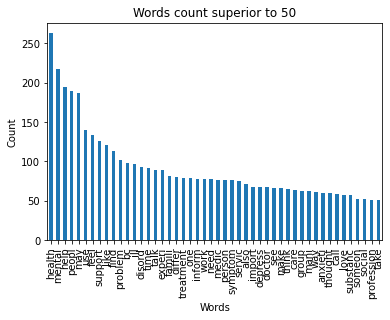

In [38]:
fig = px.histogram(sub_df, x='words', template='plotly_white', title='Words count superior to 50')
fig.update_xaxes(categoryorder='category ascending', title='Words').update_yaxes(title='Number of words')
fig.show()


print("---------------------- Two different representation -----------------------------")

sub_df["words"].value_counts().plot(kind='bar')
plt.title('Words count superior to 50')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

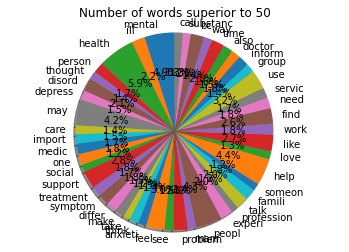

In [39]:
df_words['Counts'] = df_words.groupby('words')['words'].transform('count')
sub_dff = df_words[df_words.groupby('words').words.transform('count')>50].copy()




sub_dff = sub_dff.drop_duplicates(subset=None, 
                          keep='first', 
                          inplace=False, 
                          ignore_index=False)




labels = sub_dff["words"]
sizes = sub_dff["Counts"]
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.savefig('PieChart01.png')
plt.title("Number of words superior to 50")
plt.show()




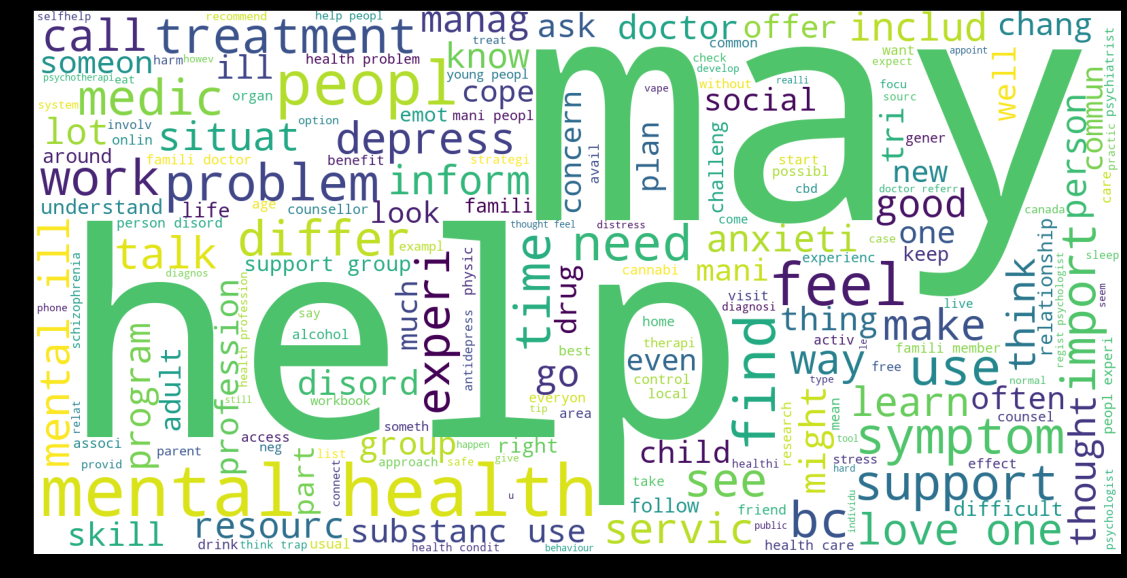

In [40]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_words['words'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

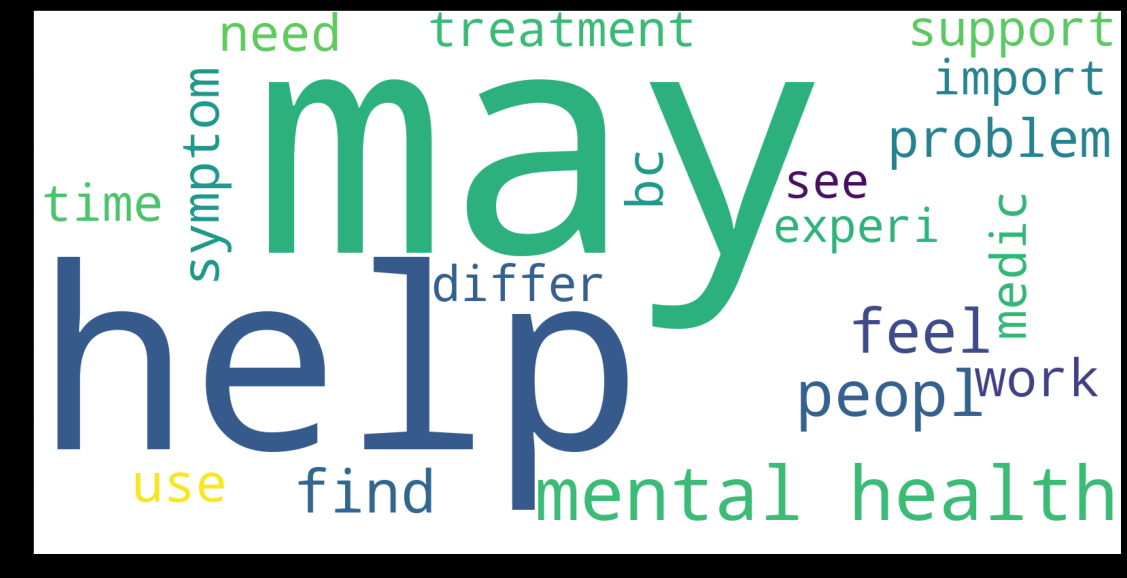

In [41]:
wordcloud = WordCloud(background_color="white",width=1600, height=800,max_words = 20).generate(' '.join(df_words['words'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

# Nous allons maintenant essayer d'appliquer nos algorithmes

In [43]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Answers_Encoded"] = label.fit_transform(df['Answers'])
df.head()


Questions                                            Answers  \
0         mean mental ill  mental ill health condit disrupt person though...   
1       mental ill affect  estim mental ill affect adult america adult se...   
2         caus mental ill  estim mental ill affect adult america adult se...   
3    warn sign mental ill  symptom mental health disord vari depend type ...   
4  peopl mental ill recov  heal mental ill earli identif treatment vital ...   

   Answers_Encoded  
0               51  
1               23  
2               24  
3               89  
4               33

In [44]:
text = df['Questions']
y= df['Answers_Encoded'].values

In [47]:
tfidf = TfidfVectorizer(use_idf=True, analyzer='word', stop_words='english', token_pattern=r'\b[^\d\W]+\b', ngram_range=(1,2))
X_train = tfidf.fit_transform(text)

In [48]:
lsvc = LinearSVC(random_state = 2021)
lsvc.fit(X_train, y)

LinearSVC(random_state=2021)

In [49]:
new_quest = [
    "Can I have danger with cannabis?"
]

new_X = tfidf.transform(new_quest)
result = lsvc.predict(new_X)

for question in result:
    df_data = df_copy.loc[df.isin([question]).any(axis=1)]
    print("Answer: ", df_data['Answers'].values)
    

Answer:  ['Cannabis smoke, for example, contains cancer-causing toxins. However, the risk of developing some cancers (e.g., mouth, tongue and lung) is less for cannabis smokers than tobacco smokers, partly because they tend to smoke less than tobacco users. And, while all drugs have an effect on the brain, the particular properties of the drug influence the level of risk of harmful consequences. The negative effects of cannabis on the brain, for example, seem to be less than the effects of some substances such as alcohol. \n Legalizing cannabis provides an opportunity to put in place regulations to minimize potential harms. The danger of buying and using any illegal drug is that we can never know for sure what exactly is in it. Cannabis is legal in Canada as of October 17, 2018. Adults (over age 19 in BC) are now permitted to possess up to 30 grams of cannabis in public. Cannabis is regulated by the Province of British Columbia and will be sold through the Liquor Distribution Branch. C

In [50]:
vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1,2))
X_train = vectorizer.fit_transform(text)

In [51]:
mnb = MultinomialNB()
mnb.fit(X_train, y)

question_test = [
    "Can I have danger with cannabis?"
]

vec_teste = vectorizer.transform(question_test)
results = mnb.predict(vec_teste)

for elem in results:
    row_df = df_copy.loc[df.isin([elem]).any(axis=1)]
    print(row_df['Answers'].values)

['Cannabis smoke, for example, contains cancer-causing toxins. However, the risk of developing some cancers (e.g., mouth, tongue and lung) is less for cannabis smokers than tobacco smokers, partly because they tend to smoke less than tobacco users. And, while all drugs have an effect on the brain, the particular properties of the drug influence the level of risk of harmful consequences. The negative effects of cannabis on the brain, for example, seem to be less than the effects of some substances such as alcohol. \n Legalizing cannabis provides an opportunity to put in place regulations to minimize potential harms. The danger of buying and using any illegal drug is that we can never know for sure what exactly is in it. Cannabis is legal in Canada as of October 17, 2018. Adults (over age 19 in BC) are now permitted to possess up to 30 grams of cannabis in public. Cannabis is regulated by the Province of British Columbia and will be sold through the Liquor Distribution Branch. Cannabis w